# Import libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
import numpy as np

# Read Data

In [26]:
df = pd.read_csv('./data/tech_layoffs.csv')

In [27]:
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [28]:
df.info()
df.describe(include='all')
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            1672 non-null   int64  
 1   Company                      1672 non-null   object 
 2   Location_HQ                  1672 non-null   object 
 3   Country                      1672 non-null   object 
 4   Continent                    1672 non-null   object 
 5   Laid_Off                     1565 non-null   float64
 6   Date_layoffs                 1672 non-null   object 
 7   Percentage                   1570 non-null   float64
 8   Company_Size_before_Layoffs  1511 non-null   float64
 9   Company_Size_after_layoffs   1536 non-null   float64
 10  Industry                     1672 non-null   object 
 11  Stage                        1672 non-null   object 
 12  Money_Raised_in_$_mil        1596 non-null   object 
 13  Year              

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [29]:
df.isnull().sum()

#                                0
Company                          0
Location_HQ                      0
Country                          0
Continent                        0
Laid_Off                       107
Date_layoffs                     0
Percentage                     102
Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Industry                         0
Stage                            0
Money_Raised_in_$_mil           76
Year                             0
lat                              0
lng                              0
dtype: int64

# Clean Dataset

In [30]:
df = df.dropna(subset=['Laid_Off', 'Percentage'])
df.isnull().sum()

df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].fillna('Unknown')

# Static Graphs for the vibe

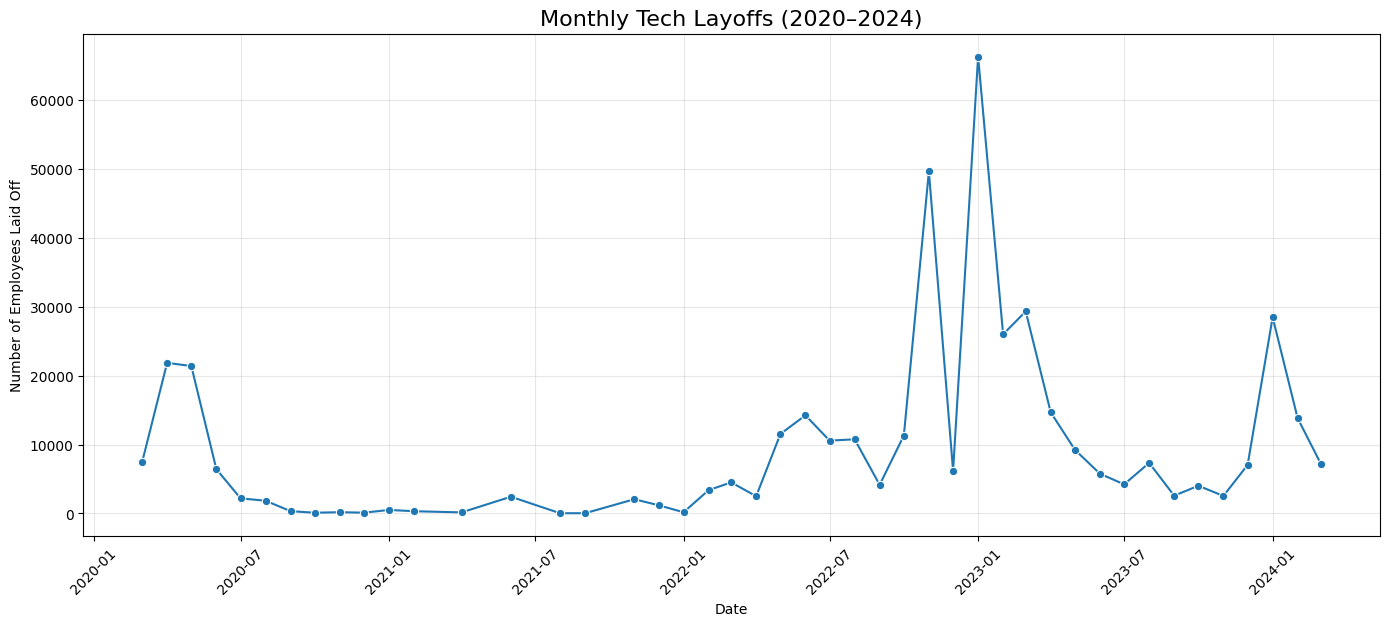

In [31]:
df['Date_layoffs'] = pd.to_datetime(df['Date_layoffs'])
monthly_layoffs = df.groupby(df['Date_layoffs'].dt.to_period('M'))['Laid_Off'].sum().reset_index()
monthly_layoffs['Date_layoffs'] = monthly_layoffs['Date_layoffs'].dt.to_timestamp()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_layoffs, x='Date_layoffs', y='Laid_Off', marker='o')

plt.title('Monthly Tech Layoffs (2020–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Employees Laid Off')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

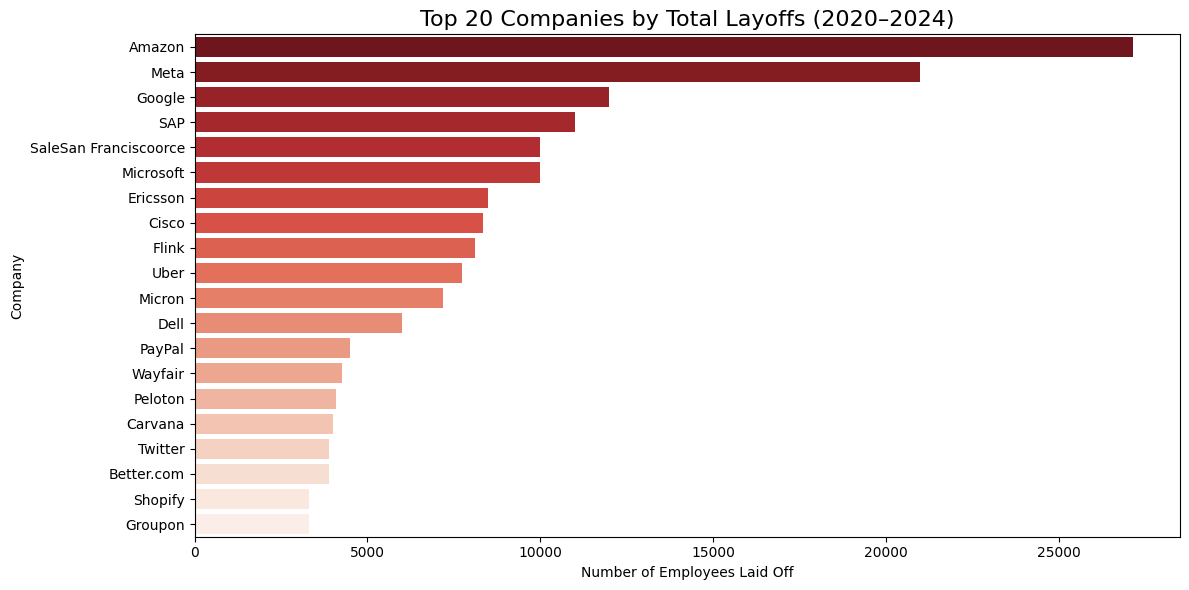

In [32]:
top_companies_with_layoffs = df.groupby('Company')['Laid_Off'].sum().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_companies_with_layoffs, x='Laid_Off', y='Company',hue='Company', palette='Reds_r')

plt.title('Top 20 Companies by Total Layoffs (2020–2024)', fontsize=16)
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

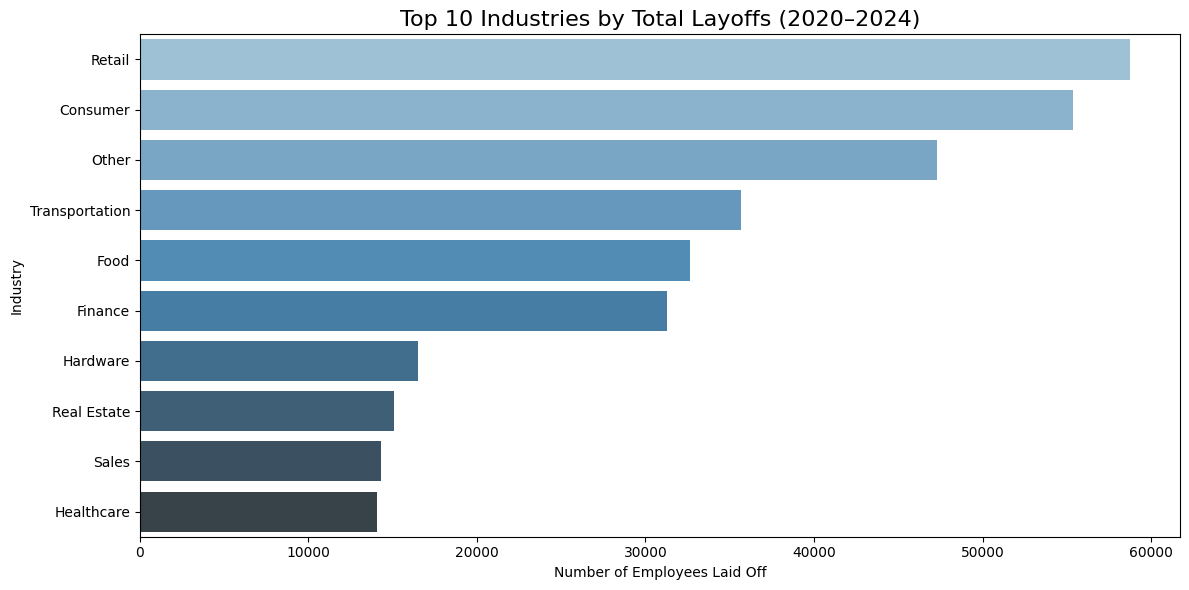

In [33]:
top_industries = df.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_industries, x='Laid_Off', y='Industry',hue='Industry', palette='Blues_d')

plt.title('Top 10 Industries by Total Layoffs (2020–2024)', fontsize=16)
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

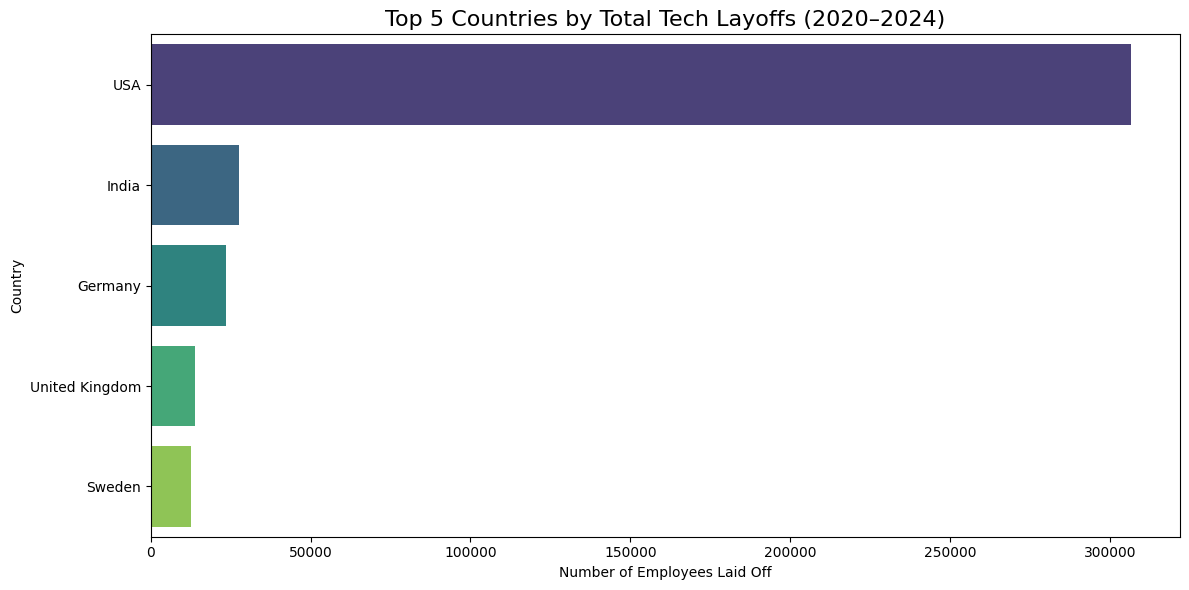

In [34]:
top_countries = df.groupby('Country')['Laid_Off'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='Laid_Off', y='Country',hue='Country', palette='viridis')

plt.title('Top 5 Countries by Total Tech Layoffs (2020–2024)', fontsize=16)
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [35]:

# Group data by Country
country_layoffs = df.groupby('Country')['Laid_Off'].sum().reset_index()

# Plotly Choropleth
fig = px.choropleth(
    country_layoffs,
    locations='Country',
    locationmode='country names',
    color='Laid_Off',
    hover_name='Country',
    color_continuous_scale='Reds',
    title='🌍 Total Tech Layoffs by Country (2020–2024)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [36]:
stage_layoffs = df.groupby('Stage')['Laid_Off'].sum().reset_index()

# Plotly Treemap
fig = px.treemap(
    stage_layoffs,
    path=['Stage'],
    values='Laid_Off',
    color='Laid_Off',
    color_continuous_scale='RdBu',
    title='🌲 Tech Layoffs by Company Stage (2020–2024)'
)

fig.update_traces(textinfo='label+value+percent entry')
fig.show()

In [37]:
size_layoffs = df.groupby('Company_Size_before_Layoffs')['Laid_Off'].sum().head(10).reset_index()

fig = px.treemap(
    size_layoffs,
    path=['Company_Size_before_Layoffs'],
    values='Laid_Off',
    color='Laid_Off',
    color_continuous_scale='Viridis',
    title='📦 Tech Layoffs by Company Size (2020–2024)'
)
fig.update_traces(textinfo='label+value+percent entry')
fig.show()


In [38]:
stage_counts = df['Stage'].value_counts(normalize=True) * 100
stage_layoffs = df.groupby('Stage')['Laid_Off'].sum()
percent_layoffs = (stage_layoffs / stage_layoffs.sum()) * 100

comparison_df = pd.DataFrame({
    'Company %': stage_counts,
    'Layoffs %': percent_layoffs
}).sort_values('Layoffs %', ascending=False)

comparison_df.head()

,Company %,Layoffs %
Stage,,
Post-IPO,23.097287,59.943104
Unknown,12.243547,6.971066
Acquired,5.890139,6.037885
Series B,13.302449,5.489328
Series D,10.787558,4.530583


In [39]:
monthly_layoffs.sort_values(by='Laid_Off', ascending=False).head(3)


,Date_layoffs,Laid_Off
30,2023-01-01,66329.0
28,2022-11-01,49656.0
32,2023-03-01,29338.0


In [40]:

industry_layoffs = df.groupby('Industry')['Laid_Off'].sum().reset_index()
industry_layoffs['Z'] = zscore(industry_layoffs['Laid_Off'])

# Industries that are statistical outliers
industry_layoffs[industry_layoffs['Z'] > 1.5]

,Industry,Laid_Off,Z
3,Consumer,55366.0,2.652900
21,Other,47292.0,2.143412
25,Retail,58779.0,2.868268


In [41]:
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].str.replace('[\$,]', '', regex=True)

# Step 2: Replace 'Unknown' (or similar) with NaN
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].replace('Unknown', np.nan)

# Step 3: Convert to float
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].astype(float)

In [42]:
df[['Money_Raised_in_$_mil', 'Laid_Off']].corr()

,Money_Raised_in_$_mil,Laid_Off
Money_Raised_in_$_mil,1.000000,0.142976
Laid_Off,0.142976,1.000000


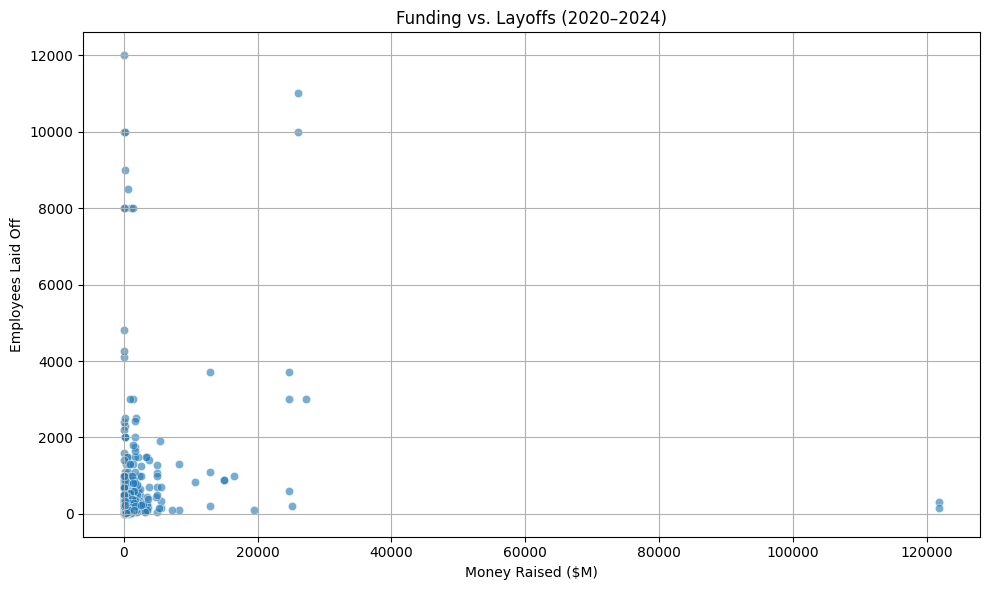

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Money_Raised_in_$_mil', y='Laid_Off', alpha=0.6)

plt.title('Funding vs. Layoffs (2020–2024)')
plt.xlabel('Money Raised ($M)')
plt.ylabel('Employees Laid Off')
plt.grid(True)
plt.tight_layout()
plt.show()


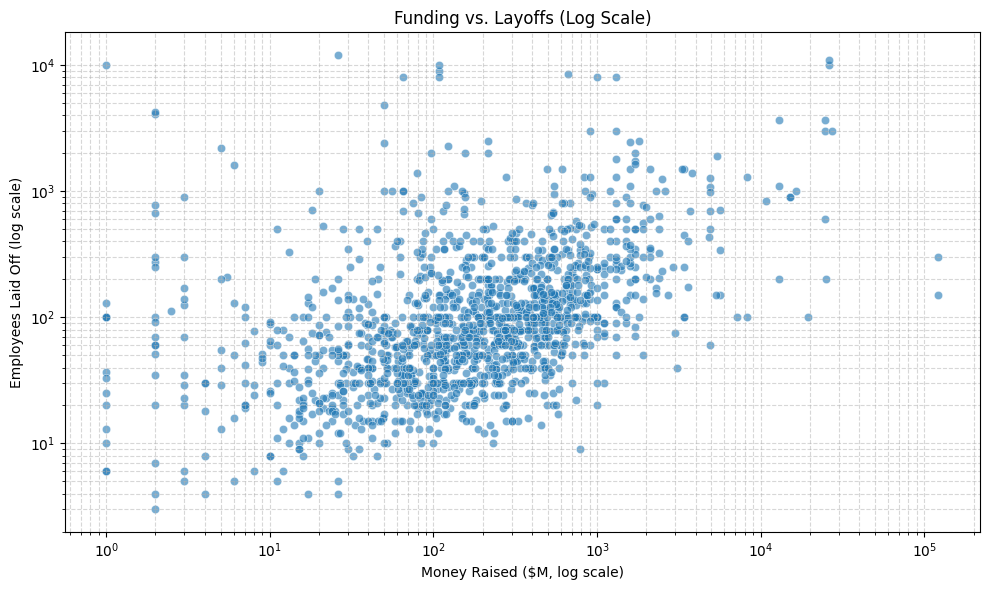

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Money_Raised_in_$_mil', y='Laid_Off', alpha=0.6)

plt.xscale('log')
plt.yscale('log')

plt.title('Funding vs. Layoffs (Log Scale)')
plt.xlabel('Money Raised ($M, log scale)')
plt.ylabel('Employees Laid Off (log scale)')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [47]:
df_outliers = df[(df['Money_Raised_in_$_mil'] > 500) & (df['Laid_Off'] > 1000)]
df_outliers[['Company', 'Money_Raised_in_$_mil', 'Laid_Off']]

,Company,Money_Raised_in_$_mil,Laid_Off
13,Spotify,2100.0,1500.0
78,Getir,1800.0,2500.0
219,Flink,1000.0,8000.0
221,Lyft,4900.0,1072.0
260,Lucid Motors,8300.0,1300.0
278,Meta,26000.0,10000.0
307,Ericsson,663.0,8500.0
327,Twilio,614.0,1500.0
385,SAP,1300.0,3000.0
392,Vacasa,834.0,1300.0


C:\Users\Samri\AppData\Local\Temp\ipykernel_20152\2569424617.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




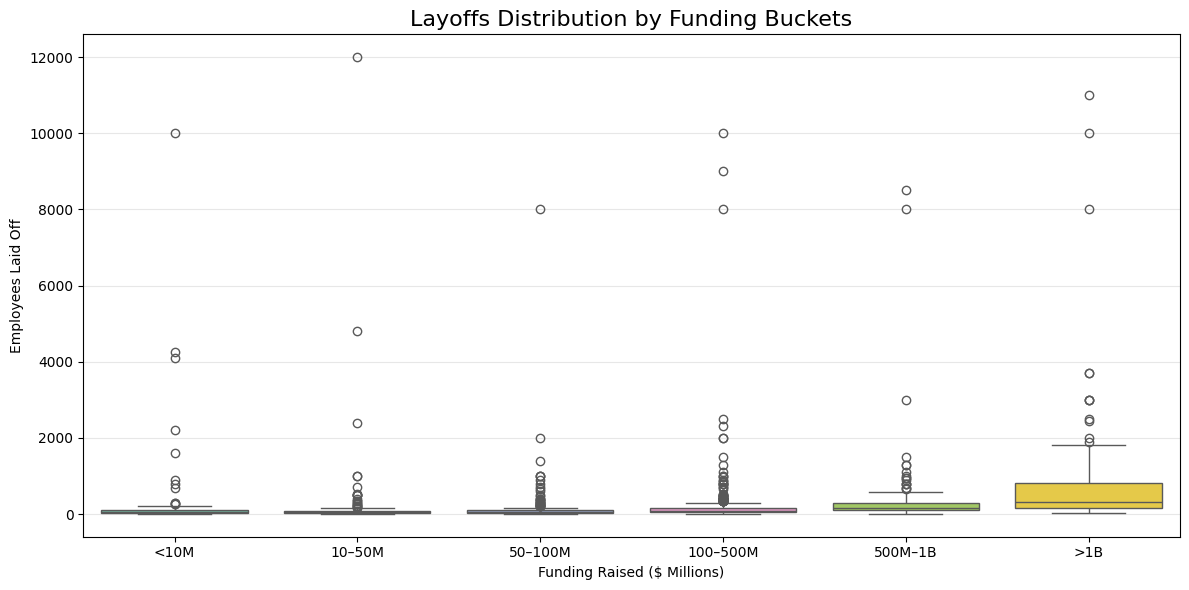

In [50]:
# Define funding buckets
bins = [0, 10, 50, 100, 500, 1000, df['Money_Raised_in_$_mil'].max()]
labels = ['<10M', '10–50M', '50–100M', '100–500M', '500M–1B', '>1B']

df['Funding_Bucket'] = pd.cut(df['Money_Raised_in_$_mil'], bins=bins, labels=labels)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Funding_Bucket', y='Laid_Off', palette='Set2')

plt.title('Layoffs Distribution by Funding Buckets', fontsize=16)
plt.xlabel('Funding Raised ($ Millions)')
plt.ylabel('Employees Laid Off')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()